In [77]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import pearsonr
from numpy import cov
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")

In [55]:
potholes.head(2000
              
             )


,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,12/31/2016,Completed - Dup,01/20/2017,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,1.155431e+06,1.947588e+06,50.0,24.0,2.0,NaN,42.011863,-87.704066,"(42.011863340092, -87.704065711004)"
1,12/31/2016,Completed,01/17/2017,16-08564309,Pothole in Street,Final Outcome,Pothole Patched,10.0,1335 W DEVON AVE,60660.0,1.166086e+06,1.942625e+06,48.0,24.0,77.0,26.0,41.998038,-87.664387,"(41.998037747035, -87.664387098024)"
2,12/31/2016,Completed,01/13/2017,16-08560586,Pothole in Street,Final Outcome,Pothole Patched,27.0,131 N CENTRAL AVE,60644.0,1.139027e+06,1.900420e+06,29.0,15.0,25.0,NaN,41.883187,-87.764813,"(41.883186901358, -87.7648132927)"
3,12/31/2016,Completed,01/17/2017,16-08559206,Pothole in Street,Final Outcome,Pothole Patched,1.0,4920 W FOSTER AVE,60630.0,1.142696e+06,1.934127e+06,39.0,16.0,12.0,NaN,41.975397,-87.751504,"(41.975396932539, -87.751504044466)"
4,12/31/2016,Completed,01/09/2017,16-08558480,Pothole in Street,Final Outcome,Pothole Patched,16.0,6315 N CICERO AVE,60646.0,1.143269e+06,1.941628e+06,39.0,17.0,12.0,NaN,41.996105,-87.748193,"(41.996105475991, -87.74819337237)"
5,12/31/2016,Completed,01/04/2017,16-08562001,Pothole in Street,Final Outcome,Pothole Patched,2.0,2543 S DAMEN AVE,60608.0,1.163441e+06,1.887121e+06,25.0,10.0,31.0,NaN,41.845550,-87.675522,"(41.845549957711, -87.675522093081)"
6,12/31/2016,Completed,01/09/2017,16-08558761,Pothole in Street,Final Outcome,Pothole Patched,2.0,2921 W BELLE PLAINE AVE,60618.0,1.156075e+06,1.927106e+06,33.0,17.0,16.0,NaN,41.955659,-87.701718,"(41.955659397156, -87.701717714781)"
7,12/31/2016,Completed - Dup,10/06/2017,16-08570078,Pothole in Street,NaN,NaN,NaN,941 S WOOD ST,60612.0,1.164528e+06,1.895845e+06,27.0,12.0,28.0,NaN,41.869250,-87.671273,"(41.869250074812, -87.671273249197)"
8,12/31/2016,Completed,01/19/2017,16-08564248,Pothole in Street,Final Outcome,Pothole Patched,16.0,1913 W TOUHY AVE,60626.0,1.162218e+06,1.947851e+06,49.0,24.0,1.0,NaN,42.012456,-87.678737,"(42.01245572154, -87.678737254108)"
9,12/31/2016,Completed,01/04/2017,16-08570117,Pothole in Street,Final Outcome,Pothole Patched,15.0,3115 E 87TH ST,60617.0,1.198556e+06,1.847887e+06,10.0,4.0,46.0,NaN,41.737316,-87.548092,"(41.737316336305, -87.548091844142)"


In [56]:
potholes.groupby(['Community Area']).count()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
Community Area,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309


In [57]:
potholes_df=potholes.groupby(['Community Area']).count()

In [58]:
potholes_df

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
Community Area,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309


In [59]:
potholes_df.reset_index(inplace=True)
potholes_df



,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
0,0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6,6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7,7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309
9,9.0,532,532,532,532,532,326,326,326,532,532,532,532,532,532,0,532,532,532


In [60]:
potholes_df=potholes_df.drop(potholes_df.index[0])

In [61]:
y=potholes_df['CREATION DATE']

In [62]:
y

1      701
2     1603
3      485
4      632
5      633
6      990
7      915
8     1310
9      532
10    1495
11     736
12    1031
13     487
14     783
15    1341
16    1052
17     973
18     266
19    1023
20     314
21     570
22     979
23     655
24    1534
25    1230
26     152
27     251
28    1221
29     509
30     836
      ... 
48     493
49    1009
50     253
51     476
52     624
53     782
54     141
55     321
56    1187
57     361
58     503
59     287
60     362
61     634
62     441
63     518
64     584
65     916
66     701
67     657
68     531
69     720
70    1231
71    1141
72     791
73     830
74     820
75     864
76     189
77    1197
Name: CREATION DATE, Length: 77, dtype: int64

In [63]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10819224,JA119772,12/31/2016 11:59:00 PM,100XX W OHARE ST,810,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,...,41,76,6,1100658.0,1934241.0,2016,02/10/2018 03:50:01 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"
1,10801137,JA100016,12/31/2016 11:58:00 PM,0000X W 113TH PL,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,False,False,...,34,49,04B,1178014.0,1829709.0,2016,02/10/2018 03:50:01 PM,41.688033,-87.623931,"(41.688033246, -87.623931468)"
2,10802006,JA100012,12/31/2016 11:55:00 PM,0000X E WACKER PL,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1176964.0,1902140.0,2016,02/10/2018 03:50:01 PM,41.886815,-87.625593,"(41.886814897, -87.625592678)"
3,10801110,JA100027,12/31/2016 11:55:00 PM,030XX N LINCOLN AVE,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,RESIDENCE,True,False,...,32,6,22,1166154.0,1920300.0,2016,01/07/2017 03:56:13 PM,41.936885,-87.664770,"(41.936884881, -87.66476981)"
4,10801865,JA100839,12/31/2016 11:54:00 PM,078XX S INDIANA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,6,69,14,1178949.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.752307,-87.619798,"(41.752307019, -87.619797619)"


In [64]:
crime_df=crime.groupby(['Community Area']).count()

In [65]:
crime_df


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Community Area,,,,,,,,,,,,,,,,,,,,,
1,869,869,869,869,869,869,869,866,869,869,...,869,869,869,860,860,869,869,860,860,860
2,868,868,868,868,868,868,868,866,868,868,...,868,868,868,864,864,868,868,864,864,864
3,847,847,847,847,847,847,847,838,847,847,...,847,847,847,839,839,847,847,839,839,839
4,525,525,525,525,525,525,525,518,525,525,...,525,525,525,521,521,525,525,521,521,521
5,376,376,376,376,376,376,376,371,376,376,...,376,376,376,372,372,376,376,372,372,372
6,1507,1507,1507,1507,1507,1507,1507,1490,1507,1507,...,1507,1507,1507,1494,1494,1507,1507,1494,1494,1494
7,1074,1074,1074,1074,1074,1074,1074,1062,1074,1074,...,1074,1074,1074,1056,1056,1074,1074,1056,1056,1056
8,2692,2692,2692,2692,2692,2692,2692,2676,2692,2692,...,2692,2692,2692,2663,2663,2692,2692,2663,2663,2663
9,76,76,76,76,76,76,76,76,76,76,...,76,76,76,75,75,76,76,75,75,75


In [66]:
x=crime_df['Case Number']

In [67]:
x

Community Area
1      869
2      868
3      847
4      525
5      376
6     1507
7     1074
8     2692
9       76
10     337
11     295
12     147
13     237
14     610
15     800
16     792
17     411
18     171
19    1186
20     337
21     572
22    1439
23    1849
24    2130
25    3978
26    1229
27    1139
28    2426
29    2181
30    1078
      ... 
48     360
49    1749
50     310
51     440
52     311
53     918
54     299
55     158
56     506
57     221
58     602
59     230
60     408
61    1177
62     262
63     547
64     221
65     498
66    1387
67    1564
68    1356
69    1572
70     777
71    1850
72     275
73     721
74     156
75     538
76     457
77     573
Name: Case Number, Length: 77, dtype: int64

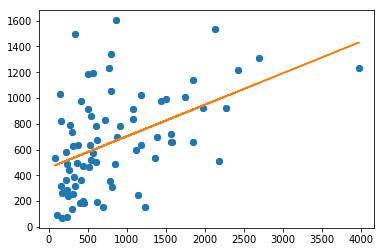

In [83]:
plt.scatter(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line)

In [72]:
covariance=cov(x,y)

In [73]:
covariance

array([[524079.16267943, 128178.77033493],
       [128178.77033493, 142252.54647984]])

In [75]:
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.469
